In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [8]:
# Load the data
data = pd.read_table('developments_in_high_throughput_sequencing.tsv', sep ='\t')
data

,Platform,Instrument,Label,Year,Reads per run,Read length (mode or average),Bases per run (gigabases),Source
0,ABI Sanger,3730xl,ABI Sanger 3730xl,2002,96,800,0.000077,0
1,454,GS20,454 GS FLX,2005,200000,100,0.020000,NaN
2,454,GS FLX,454 GS FLX,2007,400000,250,0.100000,NaN
3,454,GS FLX Titanium,454 GS FLX,2009,1000000,500,0.450000,NaN
4,454,GS FLX+,454 GS FLX,2011,1000000,700,0.700000,1
5,454,GS Junior,454 GS Junior,2010,100000,400,0.040000,2
6,454,GS Junior+,454 GS Junior,2014,100000,700,0.070000,16
7,Illumina (Solexa),GA,Illumina GA,2006,28000000,25,0.700000,NaN
8,Illumina,GA,Illumina GA,2008,28000000,35,1.000000,5
9,Illumina,GA II,Illumina GA,ND,100000000,50,5.000000,NaN


In [4]:
# Get a list of instruments
instruments = data.Label.unique()

In [5]:
instruments

array(['ABI Sanger 3730xl', '454 GS FLX', '454 GS Junior', 'Illumina GA',
       'Illumina HiSeq 2000/2500', 'Illumina HiSeq 2500 RR',
       'Illumina HiSeq 4000', 'Illumina HiSeq X', 'Illumina NextSeq 500',
       'Illumina MiSeq', 'Illumina MiniSeq', 'Illumina iSeq',
       'Illumina NovaSeq 6000 S1', 'Illumina NovaSeq 6000 S2',
       'Illumina NovaSeq 6000 S4', 'SOLiD', 'IonTorrent PGM ',
       'IonTorrent Proton', 'IonTorrent S5/S5XL', 'PacBio RS',
       'PacBio Sequel', 'Oxford Nanopore MinION Mk1', 'BGISEQ 50',
       'BGISEQ 500', 'MGISEQ 200', 'MGISEQ 2000'], dtype=object)

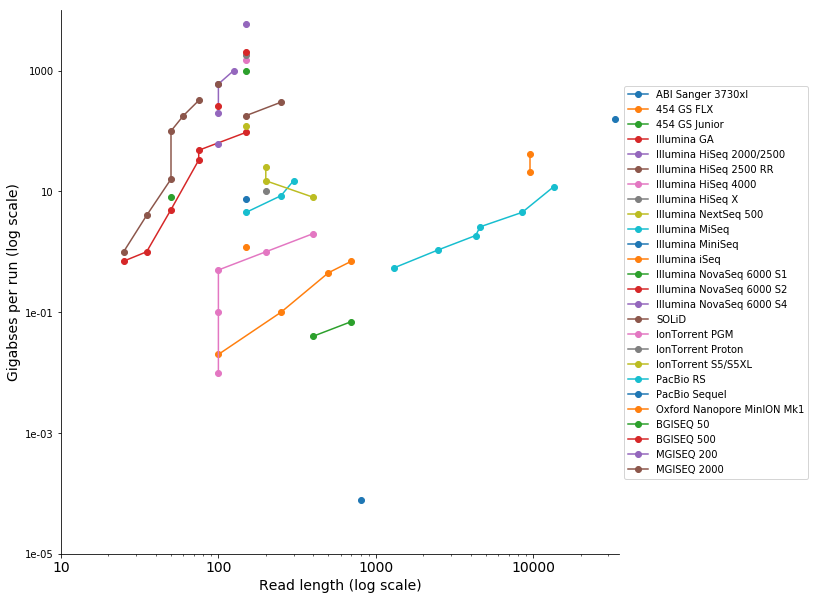

In [20]:
# Set up the plot
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
plt.xlabel('Read length (log scale)', fontsize=14)
plt.ylabel('Gigabses per run (log scale)', fontsize=14)

# Plot the data
for instrument in instruments:
    reads = data[data.Label == instrument]['Read length (mode or average)']
    bases = data[data.Label == instrument]['Bases per run (gigabases)']
    plt.plot(reads, bases, 'o-', label = instrument)

# Set scales, labels
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(10, 35000)
plt.ylim(0.00001, 10000)
ax.set_xticklabels(['1','10','100','1000','10000','100000'], fontsize=14) # Need to expand list to show the one I want
ax.yaxis.set_major_formatter(ticker.LogFormatter())
#ax.set_yticklabels(['0.0001','0.001','0.01','0.1','1','10','100','1000','10000'], fontsize=14)

# Adjust border, remove right and top
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Prepare legend box OUTSIDE of plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# finish
plt.savefig('developments_in_high_throughput_sequencing_bare.pdf', orientation='landscape')
plt.show()